In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
260,7273-TEFQD,Male,1,No,No,3,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,41.15,132.2,Yes
558,2501-XWWTZ,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.20,760.05,No
89,3016-KSVCP,Male,0,Yes,No,29,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,33.75,1009.25,No
1722,9060-HJJRW,Female,0,No,No,51,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),56.40,2928.5,No
5205,0365-TRTPY,Female,0,No,No,37,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),91.20,3382.3,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# we dont want customer id hence lets first remove it 

df.drop('customerID',axis ='columns', inplace = True) # inplace true means perform operation on original data 

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [13]:
pd.to_numeric(df.TotalCharges) # there is a space somewhere in string due to which it is not able to convert it

ValueError: Unable to parse string " " at position 488

In [15]:
 pd.to_numeric(df.TotalCharges,errors = 'coerce') # errors tell to put missing values as NAN not an number

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [19]:
# now there could be True anywhere and to get that all rows what we do is put in statment in df[] so when its trur it prints
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
df.shape

(7043, 20)

In [24]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape
# We need to drop these 11 rows

(11, 20)

In [25]:
# to search for individual row we use iloc and put in the index number in first column in the methid
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [27]:
df.iloc[488].TotalCharges

' '

In [61]:
# now to drop the 11 columns

df1 = df[df.TotalCharges != ' ']

In [62]:
df1.shape

(7032, 20)

In [63]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [64]:
# Now lets convert the column into numeric which was previosly throwing errors due to blank space

pd.to_numeric(df1.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [65]:
# it wil return only values lets store it in our df1 column

df1.loc[:,'TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

In [66]:
df1.TotalCharges.dtypes

dtype('float64')

In [69]:
df1[df1['Churn'] == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [70]:
df1[df1['Churn'] == 'Yes'].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

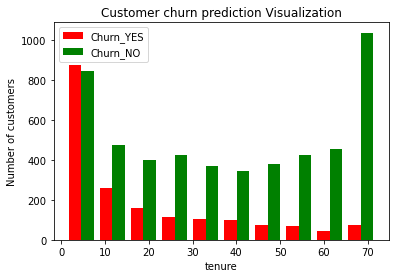

In [77]:
tenure_churn_yes = df1[df1['Churn'] == "Yes"].tenure
tenure_churn_no = df1[df1['Churn'] == "No"].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no],color = ['Red','Green'], label = ['Churn_YES','Churn_NO'])
plt.legend()

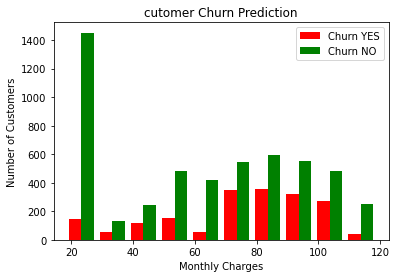

In [78]:
Monthly_charges_churn_YES = df1[df1['Churn'] == 'Yes'].MonthlyCharges
Monthly_charges_churn_NO = df1[df1['Churn'] == 'No'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("cutomer Churn Prediction")

plt.hist([Monthly_charges_churn_YES,Monthly_charges_churn_NO], color = ['red','green'], label = ['Churn YES','Churn NO'])
plt.legend()

In [80]:
for column in df1:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [86]:
def print_unique_colum_values(df):
    for column in df:
        if df[column].dtypes == object:
            print(f'{column} : {df[column].unique()}')

In [87]:
print_unique_colum_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [89]:
df1.replace('No phone service','No',inplace = True)
df1.replace('No internet service','No',inplace = True)

In [90]:
print_unique_colum_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [95]:
df1['gender'].replace({'Female':1, 'Male':0},inplace = True)

In [96]:
print_unique_colum_values(df1)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [99]:
def print_unique(df):
    for column in df:
         print(f'{column} : {df[column].unique()}')

In [100]:
print_unique(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [104]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No':0},inplace = True)

In [105]:
print_unique(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [106]:
# now to do one hot encoding because we have more than two categorical variables

df2 = pd.get_dummies(data = df1, columns = ['PaymentMethod','Contract','InternetService'])
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2748,0,0,0,0,4,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
421,1,0,0,0,7,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
196,0,0,1,1,24,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [107]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [108]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

In [110]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [111]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3108,1,0,0,1,0.591549,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
420,1,0,1,1,0.056338,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3176,1,0,1,0,0.704225,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
6706,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [112]:
print_unique(df2)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [116]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [121]:
x_train.shape

(5625, 26)

In [122]:
x_test.shape

(1407, 26)

In [123]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [124]:
y_train[:5]

5664    1
101     0
2621    0
392     0
1327    1
Name: Churn, dtype: int64

In [125]:
len(x_train.columns)

26

In [130]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'Adam', # forward and backward testing
             loss = 'binary_crossentropy', # This is a loss function
             metrics = ['accuracy']
             )
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.6938
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7938
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8024
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.7995
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8010
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8072
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8025
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7976
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4078 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8195
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8175
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8147
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8250
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8247
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8185
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8202
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8225
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8224
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 

In [131]:
model.evaluate(x_train,y_train) # it gives you final accuracy of the trained model

176/176 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8240


[0.3836952745914459, 0.8240000009536743]

In [133]:
yp = model.predict(x_test)
yp[:5]

array([[0.21203098],
       [0.48292446],
       [0.01275539],
       [0.7101201 ],
       [0.5009316 ]], dtype=float32)

In [134]:
y_test[:5] # you see this is an single array whereas the predicted array is double hence we need to make it single array

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [139]:
# if you see the array of prediected probablities, we need 0 or 1 but it has values between hence we create function for that
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred[:5])
    

[0, 0, 0, 1, 1]


In [140]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.67      0.52      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

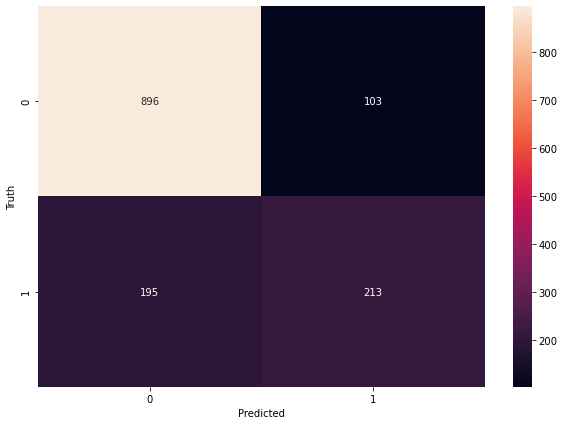

In [144]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [145]:
# precision is caculate as lets do for 0
round(896/(896+195),2)   # correct predicted values out of total predicted

0.82

In [146]:
# recall is caculate as lets do for 0
round(896/(896+103),2)   # correct predicted values out of total correct values

0.9

In [147]:
# Accuracy

round((896+213)/(896+103+213+195),2) #Correct predicted out of total

0.79